In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import curve_fit
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'lmodern'
%matplotlib inline

In [2]:
df = pd.read_csv('aufg_a.csv')
print(df)
print(df.columns)

     x     "y_0"
0  0.5  0.132939
1  1.5  0.204351
2  2.5  0.197394
3  3.5  0.157457
4  4.5  0.139232
5  5.5  0.060324
6  6.5  0.056360
7  7.5  0.051944
Index(['x', ' "y_0"'], dtype='object')


Aufgabenteil a) least squares ohne Regularisierung

In [3]:
def func(x,a0,a1,a2,a3,a4,a5,a6):
    return a0*x**6 + a1*x**5 + a2*x**4 + a3*x**3 + a4*x**2 + a5*x +a6

In [4]:
params , cov = curve_fit(func,df['x'],df[' "y_0"'],method='lm')
print(params)

[ -1.96287489e-04   4.78566325e-03  -4.52006131e-02   2.10565785e-01
  -5.13746564e-01   6.09607408e-01  -6.74448343e-02]


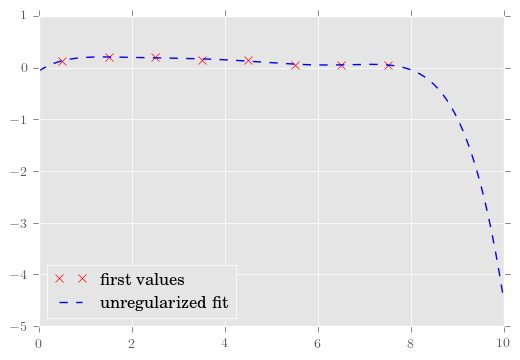

In [5]:
xx=np.linspace(0,10,1000)
plt.plot(df['x'],df[' "y_0"'],'rx',label='first values')
plt.plot(xx,func(xx,*params),'b--',label='unregularized fit')
plt.legend(loc='lower left')

Aufgabenteil b) least squares mit Regularisierung (Ridge)

In [6]:
X = df['x'].values
y = df[' "y_0"'].values
alphas = [0.1,0.3,0.7,3,10]
xx = np.linspace(0,10,1000)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.scatter(X, y)
    ax.plot(xx, est.predict(xx[:, np.newaxis]), color='red', label=label)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower left')  #, fontsize='small')


[  0.00000000e+00   3.98408576e-02   2.37780622e-02  -1.60774510e-02
   2.45036421e-03  -1.00768394e-04  -1.57905362e-06]
[  0.00000000e+00   2.29969149e-02   1.77004081e-02  -5.56852913e-03
  -1.16203148e-03   3.90150061e-04  -2.51701597e-05]
[  0.00000000e+00   1.37608196e-02   1.31475191e-02   7.69817553e-04
  -3.22846727e-03   6.62187333e-04  -3.79484647e-05]
[  0.00000000e+00   5.84671455e-03   8.15234448e-03   4.95334977e-03
  -4.17870714e-03   7.47236291e-04  -4.04580699e-05]
[  0.00000000e+00   2.95787192e-03   4.96839389e-03   4.06305987e-03
  -3.06483047e-03   5.20224266e-04  -2.68041849e-05]


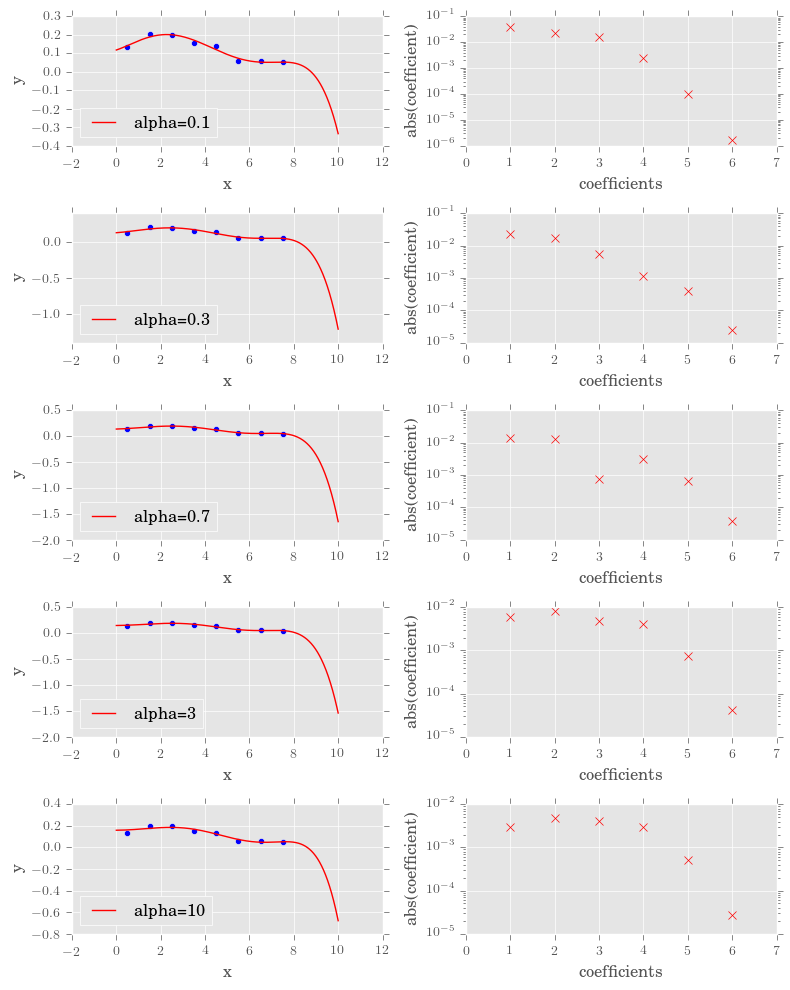

In [10]:
fig, ax_rows = plt.subplots(5, 2, figsize=(8, 10))
coeffs = pd.DataFrame()
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    print(coef)
    if yscale == 'log':
        ax.semilogy(np.abs(coef), 'rx', label=label)
    else:
        ax.plot(np.abs(coef),'rx', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, 7))

degree = 6
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X.reshape(-1,1), y)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()

Selbstimplementierte least squares 

In [11]:
def plotter(alphas,name):
    xx = np.linspace(0,8,1000)
    plt.plot(x,y,'x',label='Messwerte')
    C = np.diag(np.ones(7),-1) + np.diag(np.array([-1, -2, -2, -2, -2, -2, -2, -1])) + np.diag(np.ones(7), 1)
    Gamma = np.dot(C,A)
    for alpha in alphas:
        a = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)+ alpha* np.dot(Gamma.T,Gamma)),A.T),y.T)
        y_plot = func(xx,*a)
        plt.plot(xx,y_plot,'--',label=r'Fit $\alpha = {}$'.format(alpha))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plt.savefig('{}.pdf'.format(name))
    plt.show()
    plt.clf()

In [12]:
def get_err(y):
    return np.std(y)/np.sqrt(len(y))
def getInvErr(y):
    return np.sqrt(len(y)) / np.std(y)

In [13]:
def f_0(x):
    return x**0


def f_1(x):
    return x


def f_2(x):
    return x**2


def f_3(x):
    return x**3


def f_4(x):
    return x**4


def f_5(x):
    return x**5


def f_6(x):
    return x**6
x = df['x']
A = np.array([f_6(x), f_5(x), f_4(x), f_3(x), f_2(x), f_1(x), f_0(x)]).T


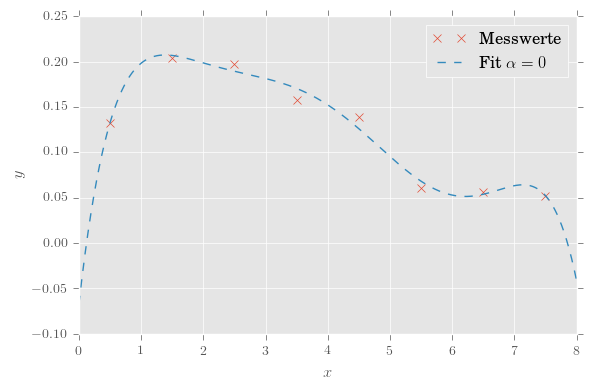

In [14]:
plotter([0],'3a')

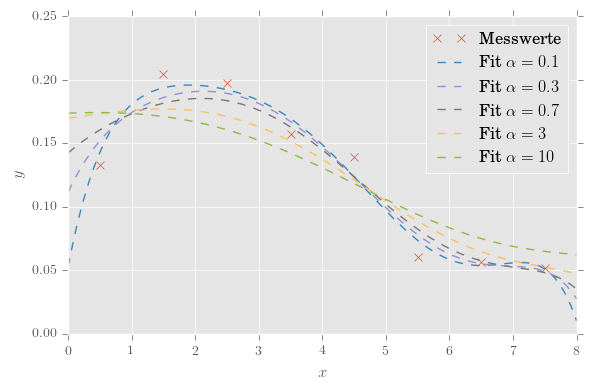

In [15]:
plotter([0.1,0.3,0.7,3,10],'3b')

In [16]:
df2 = pd.read_csv('aufg_c.csv')
x2 = df2['x']
df2

,x,"""y_0","""y_1","""y_2","""y_3","""y_4","""y_5","""y_6","""y_7","""y_8",...,"""y_40","""y_41","""y_42","""y_43","""y_44","""y_45","""y_46","""y_47","""y_48","""y_49"
0,0.5,0.103939,0.149753,0.112739,0.184439,0.145831,0.113267,0.155455,0.155187,0.105173,...,0.080580,0.111108,0.122147,0.146955,0.076564,0.114331,0.132773,0.167562,0.135968,0.131620
1,1.5,0.219092,0.193544,0.160651,0.170565,0.184050,0.163337,0.212139,0.166457,0.186264,...,0.206292,0.215006,0.147765,0.164665,0.238038,0.203325,0.203236,0.213183,0.223799,0.148379
2,2.5,0.177677,0.166459,0.236241,0.205570,0.197066,0.230060,0.170907,0.181053,0.186724,...,0.182444,0.188019,0.144067,0.239231,0.103315,0.198792,0.201374,0.197383,0.126766,0.193543
3,3.5,0.139580,0.163861,0.167301,0.141728,0.143816,0.161717,0.153893,0.131928,0.110090,...,0.179982,0.169037,0.213696,0.157921,0.229623,0.207216,0.125185,0.119271,0.212534,0.193191
4,4.5,0.115663,0.112004,0.111168,0.102507,0.108234,0.085693,0.113646,0.148677,0.199207,...,0.114844,0.126542,0.161769,0.111842,0.142766,0.097612,0.132306,0.101199,0.085060,0.094930
5,5.5,0.094581,0.089400,0.079080,0.066638,0.063737,0.101826,0.066393,0.092533,0.082094,...,0.103984,0.055161,0.073740,0.091454,0.069506,0.064214,0.104694,0.063192,0.094040,0.098975
6,6.5,0.086982,0.058229,0.081565,0.072236,0.088597,0.079524,0.062805,0.063917,0.060868,...,0.065893,0.055365,0.074342,0.052247,0.070997,0.055187,0.042896,0.085384,0.053749,0.068896
7,7.5,0.062485,0.066751,0.051256,0.056316,0.068670,0.064577,0.064761,0.060249,0.069581,...,0.065981,0.079762,0.062473,0.035685,0.069191,0.059323,0.057535,0.052826,0.068084,0.070466


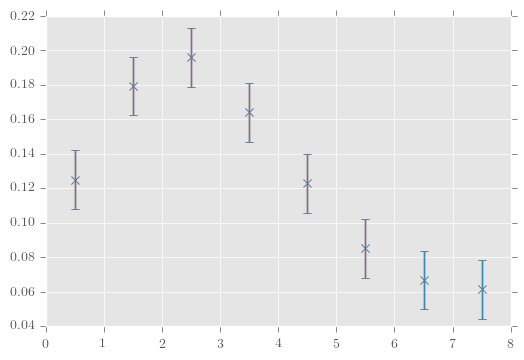

In [18]:
def getLineArrays(line):
    y = []
    for i in range(50):
        y.append(Y[i][line])
    return np.array(y)
#ekelhaft geht bestimmt auch so x, *y = ...
x, y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10, y_11, y_12, y_13, y_14, y_15, y_16, y_17, y_18, y_19, y_20, y_21, y_22, y_23, y_24, y_25, y_26, y_27, y_28, y_29, y_30, y_31, y_32, y_33, y_34, y_35, y_36, y_37, y_38, y_39, y_40, y_41, y_42, y_43, y_44, y_45, y_46, y_47, y_48, y_49 = np.genfromtxt(
    'aufg_c.csv', delimiter=', ', skip_header=1, unpack=True)
# Zusammenfassen der y-Werte in einer Matrix
Y = ([y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10, y_11, y_12, y_13, y_14, y_15, y_16, y_17, y_18, y_19, y_20, y_21, y_22, y_23, y_24, y_25,
      y_26, y_27, y_28, y_29, y_30, y_31, y_32, y_33, y_34, y_35, y_36, y_37, y_38, y_39, y_40, y_41, y_42, y_43, y_44, y_45, y_46, y_47, y_48, y_49])
# Erzeugen von Arrays von y-Werten, die die Inhalte der Zeilen der
# csv-Tabelle enthalten
y_0 = getLineArrays(0)
y_1 = getLineArrays(1)
y_2 = getLineArrays(2)
y_3 = getLineArrays(3)
y_4 = getLineArrays(4)
y_5 = getLineArrays(5)
y_6 = getLineArrays(6)
y_7 = getLineArrays(7)
# Berechnung des Vektors y als Mittelwertvektor von y_0 bis y_7
y = np.array((np.mean(y_0), np.mean(y_1), np.mean(y_2), np.mean(
    y_3), np.mean(y_4), np.mean(y_5), np.mean(y_6), np.mean(y_7)))

# Berechnung der Gewichtungsmatrix
invErr = (getInvErr(y_0), getInvErr(y_1), getInvErr(y_2), getInvErr(
    y_3), getInvErr(y_4), getInvErr(y_5), getInvErr(y_6), getInvErr(y_7))
W = np.diag(invErr)

# Plot der Messwerte
err = get_err(y)
plt.errorbar(x, y, yerr=err, fmt='x', label='Messwerte')
plt.errorbar(x, y, yerr=err, fmt='x', label='Messwerte')

# Berechnung des Loesungsvektors a
a = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(A.T, np.dot(W, A))), A.T), W), y)

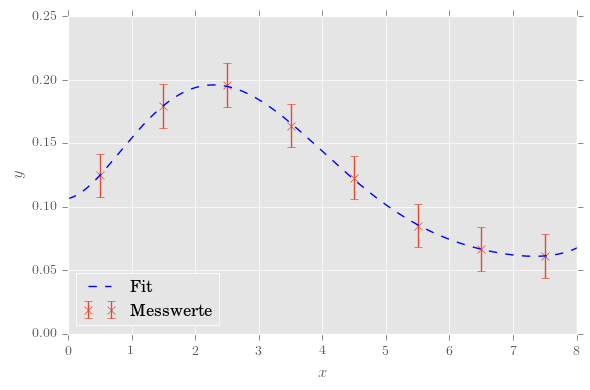

In [21]:
y_plot = func(xx, *a) 
plt.errorbar(x, y, yerr=err, fmt='x', label='Messwerte')
# Plot der Fitkurve
plt.plot(xx, y_plot, 'b--', label=r'Fit')
plt.xlim(0,8)
plt.ylim(0,0.25)
# Einstellungen
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('3_c.pdf')